This example uses the *matrix* method to generate the *Hn*.  This example uses simple emoji style faces.

In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import NONE, VERTEX, BETA, ALPHA
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn
from hypernetworks.utils.HTMatrix import to_matrix, from_matrix, matrix_to_string

import numpy as np

from IPython.display import Image, display

parser = load_parser()

	HELLO 10.10 f1 
	HELLO 10.11 f1 
	HELLO 10.7 f1 
	HELLO 10.11 e N
	HELLO 10.7 e N
	HELLO 10.11 s N
	HELLO 10.7 s N
	HELLO 10.11 r N
	HELLO 10.7 r N
	HELLO 10.10 f2 
	HELLO 10.11 f2 
	HELLO 10.7 f2 
	HELLO 10.9 e N
HELLO 3 N
	HELLO 10.11 f N
	HELLO 10.7 f N
	HELLO 10.9 r N
HELLO 3 N
	HELLO 10.10 f3 
	HELLO 10.11 f3 
	HELLO 10.7 f3 
	HELLO 10.9 e N
HELLO 3 N
	HELLO 10.9 s N
HELLO 3 N
	HELLO 10.11 sq N
	HELLO 10.7 sq N
HELLO 1 N
	HELLO 2 N
HELLO 1 N
	HELLO 2 N
HELLO 1 N
	HELLO 2 N
f1=<e, s, r; R_face>^N
f2=<e, f, r; R_face>^N
f3=<e, s, sq; R_face>^N



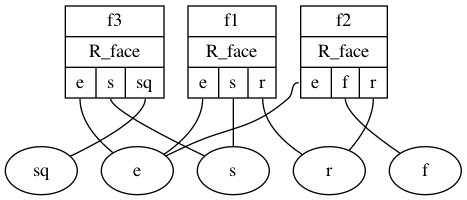

In [2]:
face1 = Hypernetwork()

compile_hn(face1, parser, """
    f1=<e, s, r; R_face>
    f2=<e, f, r; R_face>
    f3=<e, s, sq; R_face>
""")

print(face1)

draw_hn(face1, fname="/tmp/face1", view=False)
Image(filename='/tmp/face1.png', width=500, height=500)

	HELLO 10.10 @Hs_0@ 
	HELLO 10.11 @Hs_0@ 
	HELLO 10.7 @Hs_0@ 
	HELLO 10.11 r N
	HELLO 10.7 r N
	HELLO 10.11 sq N
	HELLO 10.7 sq N
	HELLO 10.10 @Hs_1@ 
	HELLO 10.11 @Hs_1@ 
	HELLO 10.7 @Hs_1@ 
	HELLO 10.11 s N
	HELLO 10.7 s N
	HELLO 10.9 @Hs_0@ N
HELLO 3 N
	HELLO 10.10 @Hs_2@ 
	HELLO 10.11 @Hs_2@ 
	HELLO 10.7 @Hs_2@ 
	HELLO 10.9 s N
HELLO 3 N
	HELLO 10.11 f N
	HELLO 10.7 f N
	HELLO 10.10 @Hs_3@ 
	HELLO 10.11 @Hs_3@ 
	HELLO 10.7 @Hs_3@ 
	HELLO 10.9 @Hs_2@ N
HELLO 3 N
	HELLO 10.9 r N
HELLO 3 N
	HELLO 10.10 @Hs_4@ 
	HELLO 10.11 @Hs_4@ 
	HELLO 10.7 @Hs_4@ 
	HELLO 10.9 @Hs_1@ N
HELLO 3 N
	HELLO 10.9 @Hs_3@ N
HELLO 3 N
	HELLO 10.10 @Hs_5@ 
	HELLO 10.11 @Hs_5@ 
	HELLO 10.7 @Hs_5@ 
	HELLO 10.11 e N
	HELLO 10.7 e N
	HELLO 10.9 @Hs_4@ N
HELLO 3 N


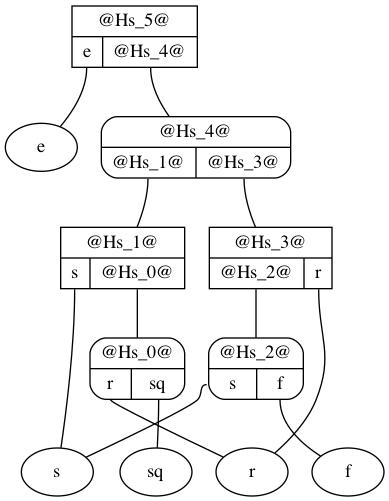

In [3]:
# print(face1)

M = to_matrix(face1, R="face")
new_face1 = from_matrix(M, R="face")

draw_hn(new_face1, fname="/tmp/face1-M", view=False)
Image(filename='/tmp/face1-M.png', width=400, height=600)

	HELLO 10.10 @Hs_0@ 
	HELLO 10.11 @Hs_0@ 
	HELLO 10.7 @Hs_0@ 
	HELLO 10.11 e N
	HELLO 10.7 e N
	HELLO 10.11 s N
	HELLO 10.7 s N
	HELLO 10.11 r N
	HELLO 10.7 r N
	HELLO 10.10 @Hs_1@ 
	HELLO 10.11 @Hs_1@ 
	HELLO 10.7 @Hs_1@ 
	HELLO 10.9 e N
HELLO 3 N
	HELLO 10.11 f N
	HELLO 10.7 f N
	HELLO 10.9 r N
HELLO 3 N
	HELLO 10.10 @Hs_2@ 
	HELLO 10.11 @Hs_2@ 
	HELLO 10.7 @Hs_2@ 
	HELLO 10.9 e N
HELLO 3 N
	HELLO 10.9 s N
HELLO 3 N
	HELLO 10.11 sq N
	HELLO 10.7 sq N
	HELLO 10.10 @Hs_3@ 
	HELLO 10.11 @Hs_3@ 
	HELLO 10.7 @Hs_3@ 
	HELLO 10.9 e N
HELLO 3 N
	HELLO 10.9 f N
HELLO 3 N
	HELLO 10.9 sq N
HELLO 3 N
HELLO 1 N
	HELLO 2 N
HELLO 1 N
	HELLO 2 N
HELLO 1 N
	HELLO 2 N
HELLO 1 N
	HELLO 2 N
@Hs_0@=<e, s, r; R_face>^N
@Hs_1@=<e, f, r; R_face>^N
@Hs_2@=<e, s, sq; R_face>^N
@Hs_3@=<e, f, sq; R_face>^N



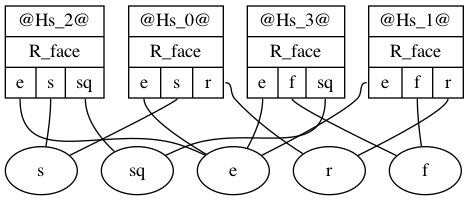

In [4]:
face3 = Hypernetwork()

compile_hn(face3, parser, """
    <e, s, r; R_face>
    <e, f, r; R_face>
    <e, s, sq; R_face>
    <e, f, sq; R_face>
""")

print(face3)

draw_hn(face3, fname="/tmp/face3", view=False)
Image(filename='/tmp/face3.png', width=400, height=600)

	HELLO 10.10 @Hs_0@ 
	HELLO 10.11 @Hs_0@ 
	HELLO 10.7 @Hs_0@ 
	HELLO 10.11 r N
	HELLO 10.7 r N
	HELLO 10.11 sq N
	HELLO 10.7 sq N
	HELLO 10.10 @Hs_1@ 
	HELLO 10.11 @Hs_1@ 
	HELLO 10.7 @Hs_1@ 
	HELLO 10.11 s N
	HELLO 10.7 s N
	HELLO 10.9 @Hs_0@ N
HELLO 3 N
	HELLO 10.10 @Hs_2@ 
	HELLO 10.11 @Hs_2@ 
	HELLO 10.7 @Hs_2@ 
	HELLO 10.9 s N
HELLO 3 N
	HELLO 10.11 f N
	HELLO 10.7 f N
	HELLO 10.10 @Hs_3@ 
	HELLO 10.11 @Hs_3@ 
	HELLO 10.7 @Hs_3@ 
	HELLO 10.9 @Hs_2@ N
HELLO 3 N
	HELLO 10.9 r N
HELLO 3 N
	HELLO 10.5 
HELLO 3 N
	HELLO 10.10 @Hs_5@ 
	HELLO 10.11 @Hs_5@ 
	HELLO 10.7 @Hs_5@ 
	HELLO 10.9 f N
HELLO 3 N
	HELLO 10.9 @Hs_4@ N
HELLO 3 N
	HELLO 10.5 
HELLO 3 N
	HELLO 10.10 @Hs_7@ 
	HELLO 10.11 @Hs_7@ 
	HELLO 10.7 @Hs_7@ 
	HELLO 10.9 @Hs_6@ N
HELLO 3 N
	HELLO 10.9 sq N
HELLO 3 N
	HELLO 10.10 @Hs_8@ 
	HELLO 10.11 @Hs_8@ 
	HELLO 10.7 @Hs_8@ 
	HELLO 10.9 @Hs_1@ N
HELLO 3 N
	HELLO 10.9 @Hs_3@ N
HELLO 3 N
	HELLO 10.9 @Hs_5@ N
HELLO 3 N
	HELLO 10.9 @Hs_7@ N
HELLO 3 N
	HELLO 10.10 @Hs_9@ 
	HELLO 10.11

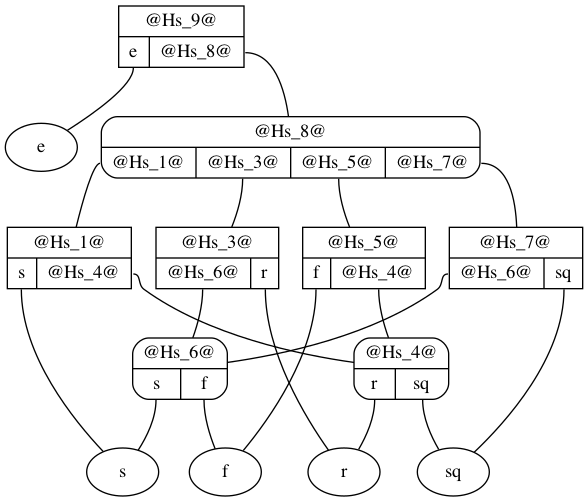

In [5]:
M = to_matrix(face3, R="face")

new_face3 = from_matrix(M, R="face")

# print(new_face3)

draw_hn(new_face3, fname="/tmp/face3-M", view=False)
Image(filename='/tmp/face3-M.png', width=400, height=600)

In [6]:
def format_hn(hn):
    class Hn:
        hn = {}
        
    def _first_pass():
        for name in hn.hypernetwork:
            hs = hn.hypernetwork[name]
            if hs.hstype in [ALPHA, BETA]:
                Hn.hn.update({name: hs})
        
    def _second_pass():
        for name, hs in Hn.hn.items():
            for i, vertex in enumerate(hs.simplex):
                if vertex[:4] == "@Hs_":
                    Hn.hn[vertex].simplex[i] = str(hn.hypernetwork[vertex])[len(vertex)+1:]
                    print("HELLO ", Hn.hn[vertex].simplex)

    hn_str = ""
    _first_pass()
    _second_pass()
    
#     for name in hn.hypernetwork:
#         hs = hn.hypernetwork[name]
#         hn_str = str(hs)

#         if hs.hstype in [ALPHA, BETA]:
#             for vertex in hs.simplex:
#                 if hn.hypernetwork[vertex].hstype in [ALPHA, BETA]:
#                     hs_str = str(hn.hypernetwork[vertex])[len(vertex)+1:]
#                     print(hs_str)
#                     hn_str.replace(vertex, hs_str)
#                     print(hn_str)

    return hn_str
                    
print(format_hn(face1))